In [37]:
import pandas as pd
from datetime import datetime, timedelta


In [38]:
yesterday = datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')
covidurl = f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{yesterday}.xlsx'

try:
    df = pd.read_csv('covid.csv', parse_dates=['dateRep'], infer_datetime_format=True)
except Exception as e:
    print(f'could not load covid.csv, downloading data from {yesterday}')
    df = pd.read_excel(covidurl, parse_dates=['dateRep'], infer_datetime_format=True)
    df.to_csv('covid.csv', index=False)

df = df.sort_values(['countriesAndTerritories', 'dateRep'])

In [39]:
def getcovid(df, country, mindpm, startdpm, minpop, maxdpm=None, mindays=0):
    c = df[df.countriesAndTerritories==country].sort_values('dateRep')
    maxpop = c.popData2018.max()
    if maxpop < minpop:
        return pd.DataFrame()
    c['cumcases'] = c.cases.cumsum()
    c['cumdeaths'] = c.deaths.cumsum()
    c['CFR'] = c.cumdeaths / c.cumcases
    c['DPM'] = c.cumdeaths*1e6 / maxpop
    hidpm = c.DPM.max()
    if hidpm < mindpm:
        return pd.DataFrame()
    if maxdpm and hidpm > maxdpm:
        return pd.DataFrame()
    c = c[c.DPM >= startdpm]
    if len(c) <= mindays:
        return pd.DataFrame()
    c = c.set_index('dateRep')
    return c[['cases', 'deaths', 'cumcases', 'cumdeaths', 'CFR', 'DPM']]


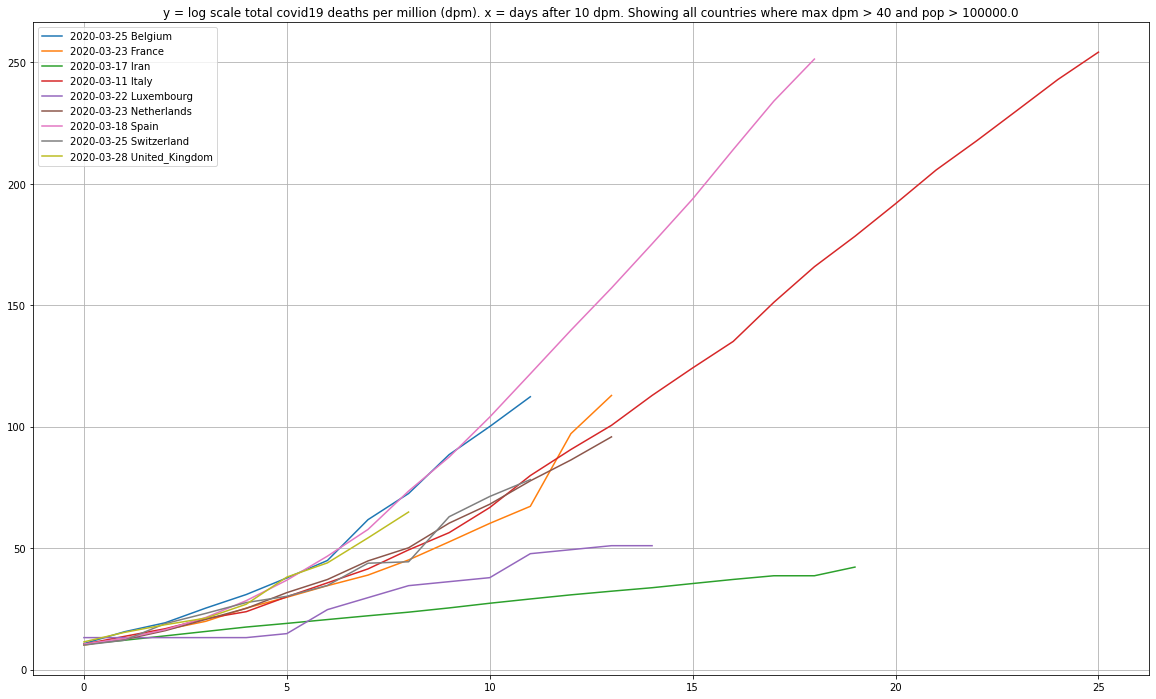

In [46]:
countries = df.countriesAndTerritories.unique()
mindpm = 40
startdpm = 10
minpop = 1e5
pltdf = pd.DataFrame(index=list(range(50)))

for country in countries:
    c = getcovid(df, country, mindpm, startdpm, minpop)
    if c.empty:
        continue
    startdate = c.index[0].strftime('%Y-%m-%d')
    c = c.reset_index()
    pltdf[f"{startdate} {country}"] = c.DPM
    
p = pltdf.plot(
        figsize=(20,12), 
        legend=True, 
        logy=False, 
        grid=True,
        title=f'y = log scale total covid19 deaths per million (dpm). x = days after {startdpm} dpm. Showing all countries where max dpm > {mindpm} and pop > {minpop}'
    )

p.get_figure().savefig('output.png')


In [41]:
nl = 'Netherlands'
nz = 'New_Zealand'
us = 'United_States_of_America'
be = 'Belgium'

In [42]:
c1 = getcovid(df, us, 0,0.1,0)
c1

,cases,deaths,cumcases,cumdeaths,CFR,DPM
dateRep,,,,,,
2020-03-13,351,10,1663,40,0.024053,0.122262
2020-03-14,511,7,2174,47,0.021619,0.143657
2020-03-15,777,10,2951,57,0.019315,0.174223
2020-03-16,823,12,3774,69,0.018283,0.210901
2020-03-17,887,16,4661,85,0.018236,0.259806
2020-03-18,1766,23,6427,108,0.016804,0.330106
2020-03-19,2988,42,9415,150,0.015932,0.458481
2020-03-20,4835,0,14250,150,0.010526,0.458481
2020-03-21,5374,110,19624,260,0.013249,0.794700


In [43]:
c2 = getcovid(df, 'Netherlands', 0,0.1,0)
c2

,cases,deaths,cumcases,cumdeaths,CFR,DPM
dateRep,,,,,,
2020-03-09,77,2,265,3,0.011321,0.174105
2020-03-10,56,0,321,3,0.009346,0.174105
2020-03-11,61,1,382,4,0.010471,0.232140
2020-03-12,121,1,503,5,0.009940,0.290174
2020-03-13,111,0,614,5,0.008143,0.290174
2020-03-14,190,0,804,5,0.006219,0.290174
2020-03-15,155,7,959,12,0.012513,0.696419
2020-03-16,176,8,1135,20,0.017621,1.160698
2020-03-17,278,4,1413,24,0.016985,1.392837
